In [ ]:
import numpy as np
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
%matplotlib inline

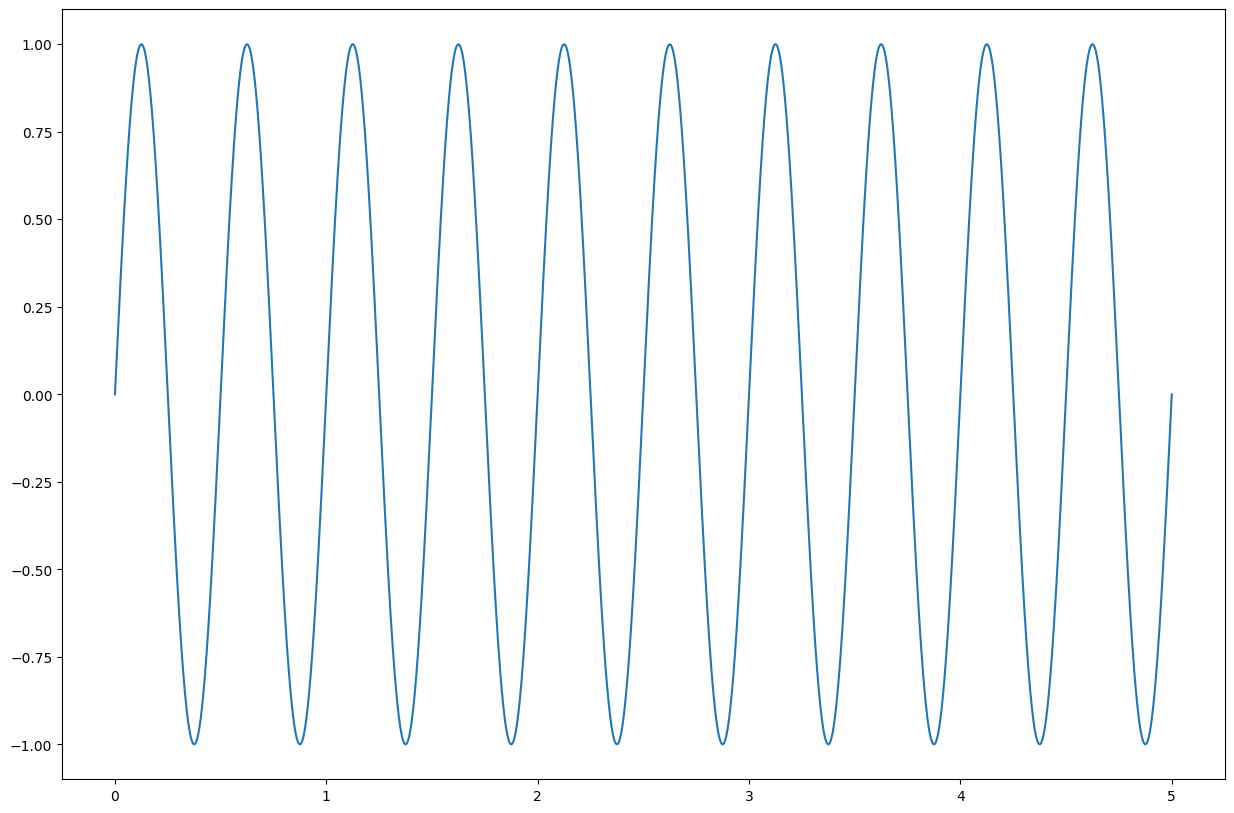

In [17]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

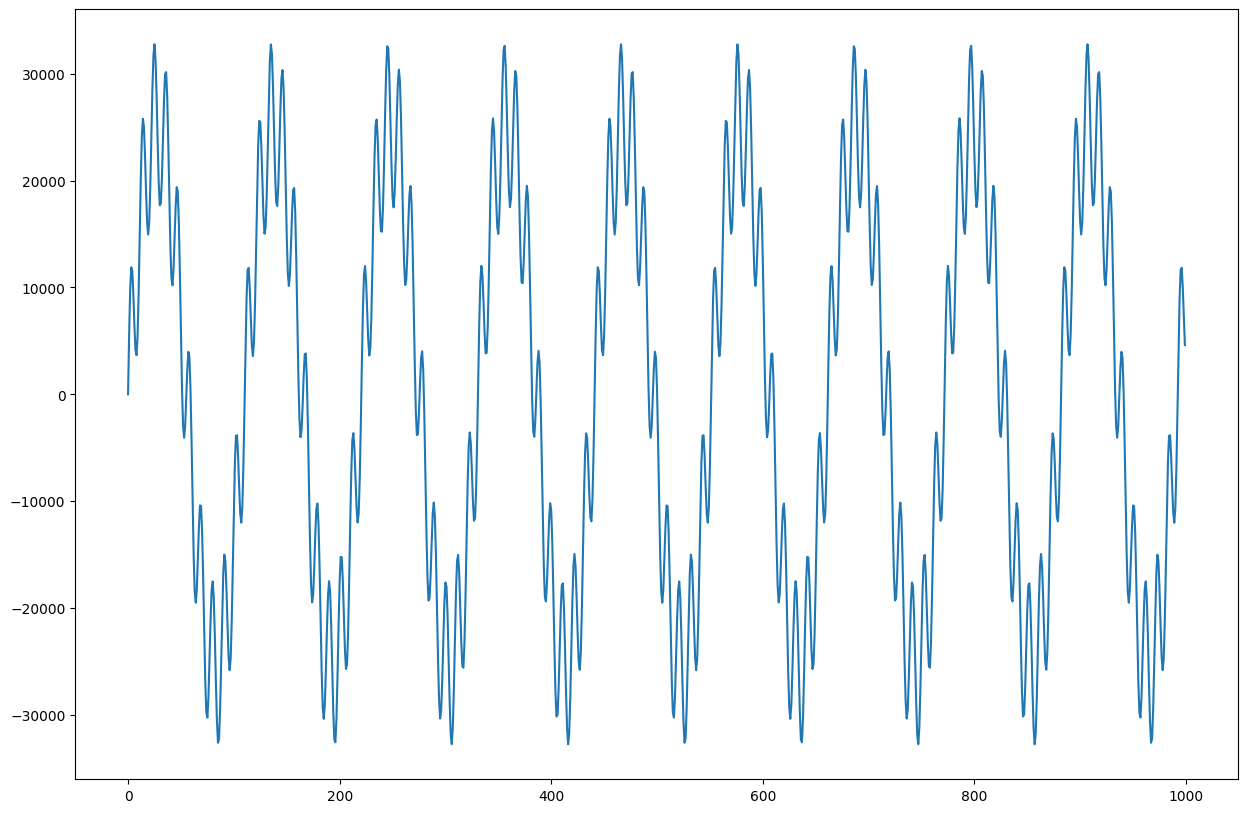

In [18]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

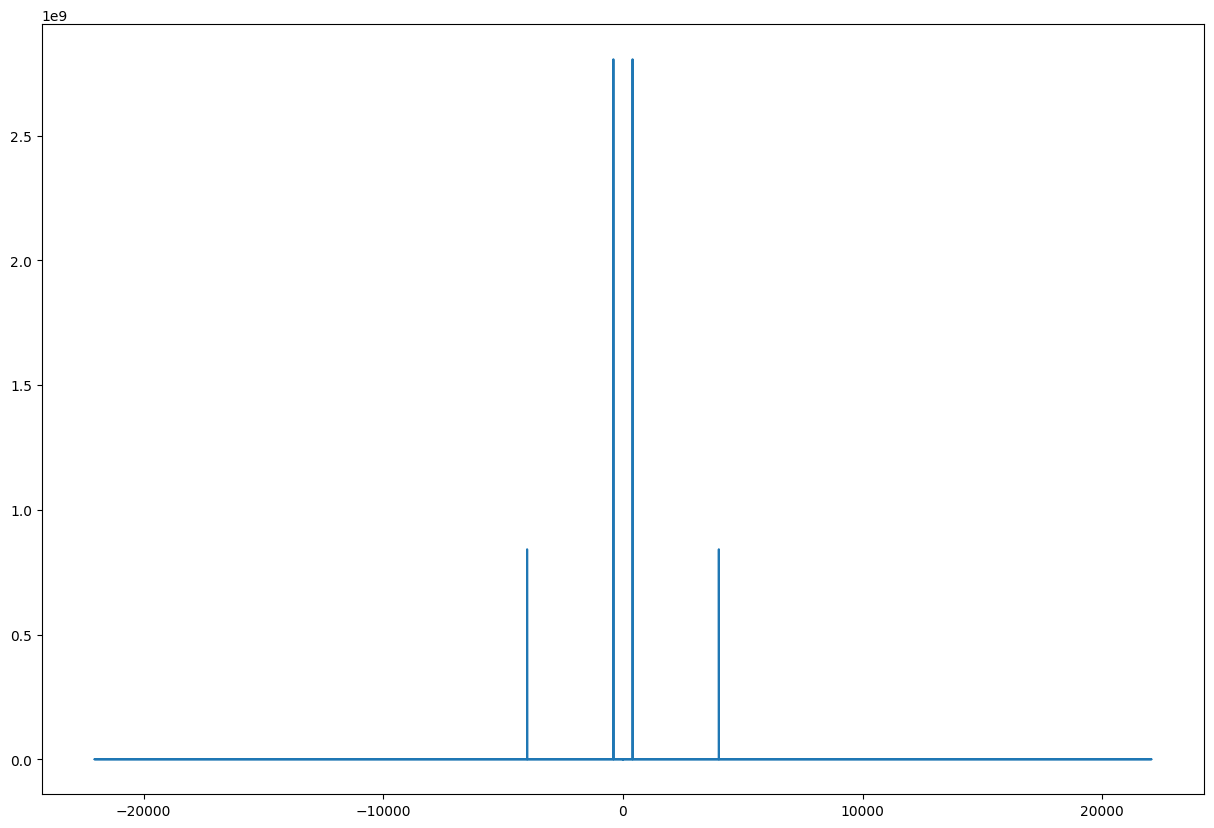

In [19]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

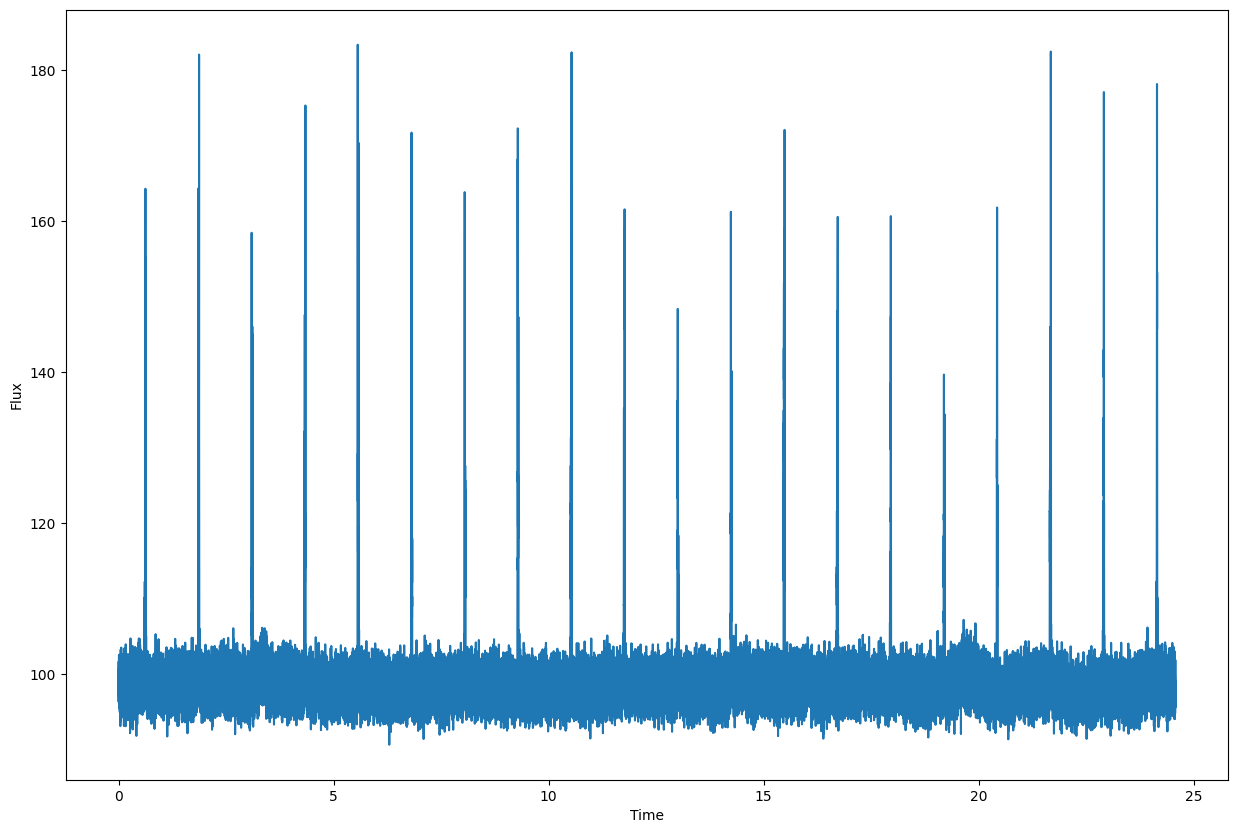

In [14]:
Data = np.loadtxt('/content/fft_data.txt')
time = Data[:, 0]
observed_flux = Data[:, 1]

plt.rcParams["figure.figsize"] = (15,10)
plt.plot(time, observed_flux)
plt.xlabel("Time")
plt.ylabel("Flux")
plt.show()

# New Section

<ipython-input-15-bd237ff0b019>:1: RuntimeWarning: divide by zero encountered in log
  time_log = np.log(time)


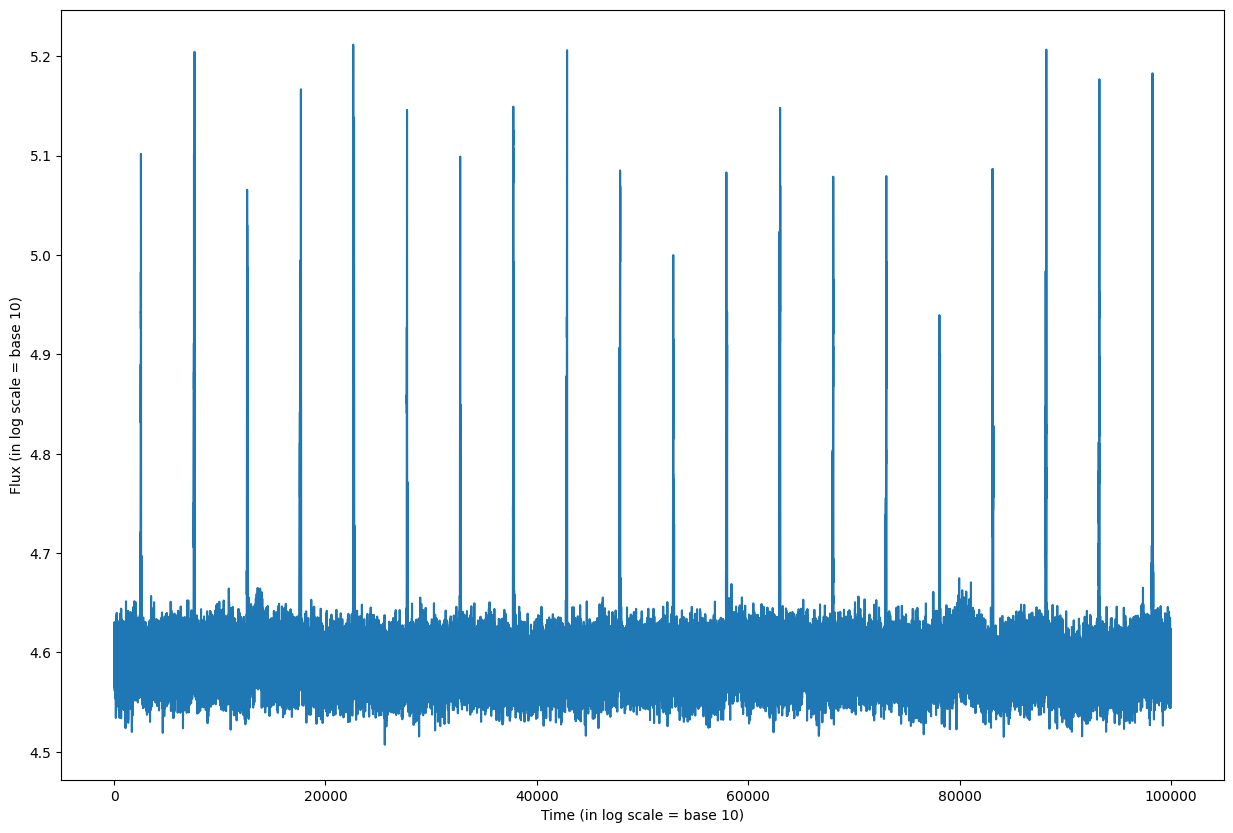

In [15]:
time_log = np.log(time)
observed_flux_log = np.log(observed_flux)


plt.rcParams["figure.figsize"] = (15,10)
plt.plot(observed_flux_log)
plt.xlabel("Time (in log scale = base 10)")
plt.ylabel("Flux (in log scale = base 10)")
plt.show()

/tmp/ipykernel_195744/904640538.py:10: RuntimeWarning: divide by zero encountered in log10
  Frequency_log = np.log10(Frequency)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


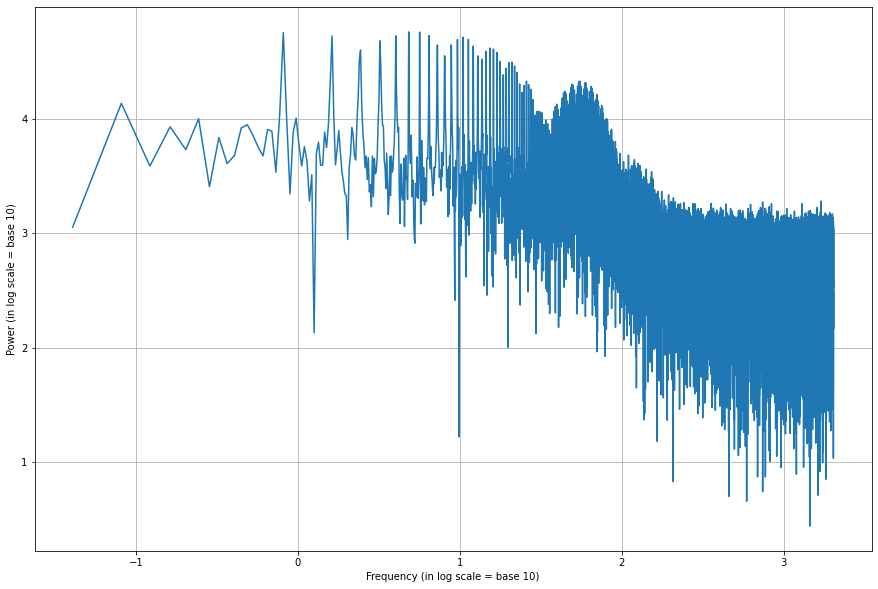

In [ ]:
## Performed fast fourier transformation

sample_rate = 100000/2.457575424000000197e+01
N = len(observed_flux)

Power = rfft(observed_flux)
Power_log = np.log10(Power)

Frequency = rfftfreq(N, 1/sample_rate)
Frequency_log = np.log10(Frequency)

plt.plot(Frequency_log, Power_log)
plt.xlabel("Frequency (in log scale = base 10)")
plt.ylabel("Power (in log scale = base 10)")
plt.grid()

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:486: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[-0.33559442  3.65575977]


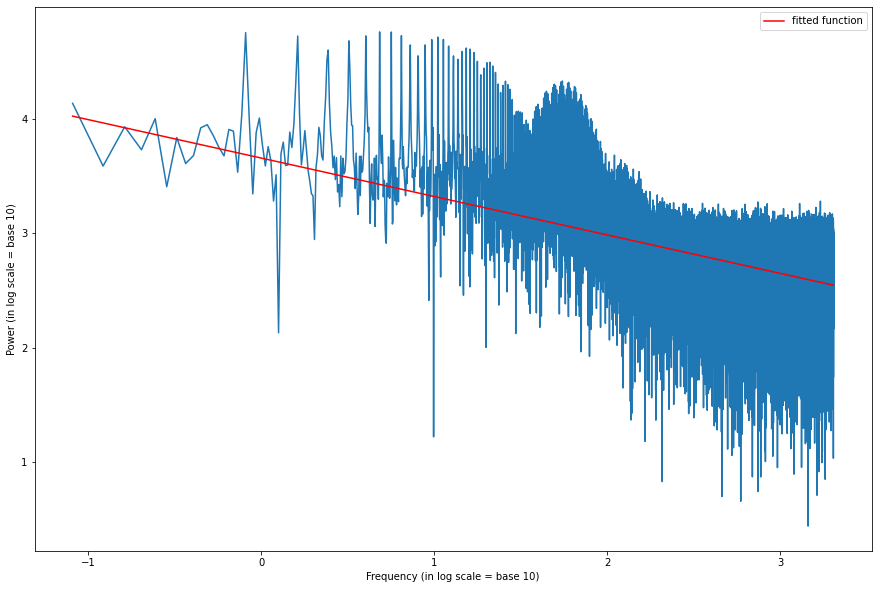

In [ ]:
## Fitting Linear curve into the data

Frequency_log = Frequency_log[1:]
Power_log = Power_log[1:]

def lin(x,a,c):
    return a*x + c

popt, pcov = curve_fit(lin, Frequency_log, Power_log)

a, c = popt
print(popt)


plt.plot(Frequency_log, Power_log)
plt.xlabel("Frequency (in log scale = base 10)")
plt.ylabel("Power (in log scale = base 10)")

plt.plot(Frequency_log, lin(Frequency_log, popt[0], popt[1]), color='r', label='fitted function')
plt.legend(loc='best')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


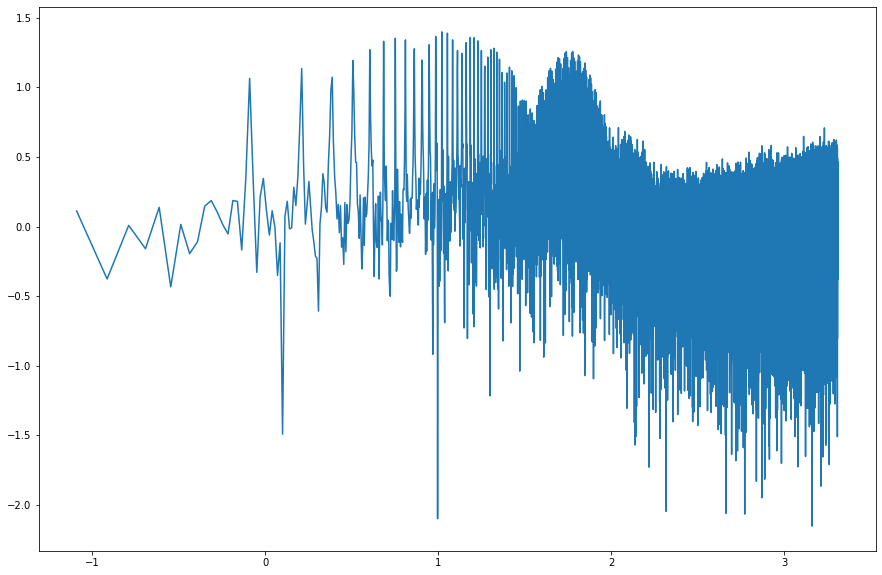

In [ ]:
##Subtracting the linear data from the original data

lin_power = lin(Frequency_log, popt[0], popt[1])
Subtraction = Power_log - lin_power

plt.plot(Frequency_log, Subtraction)
plt.show()

## Here we've subtracted the data to remove the linear trend and then we will got a dataset which can be fitted using gaussian
# function.

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:486: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[0.28888512 1.6537271  4.45926599]


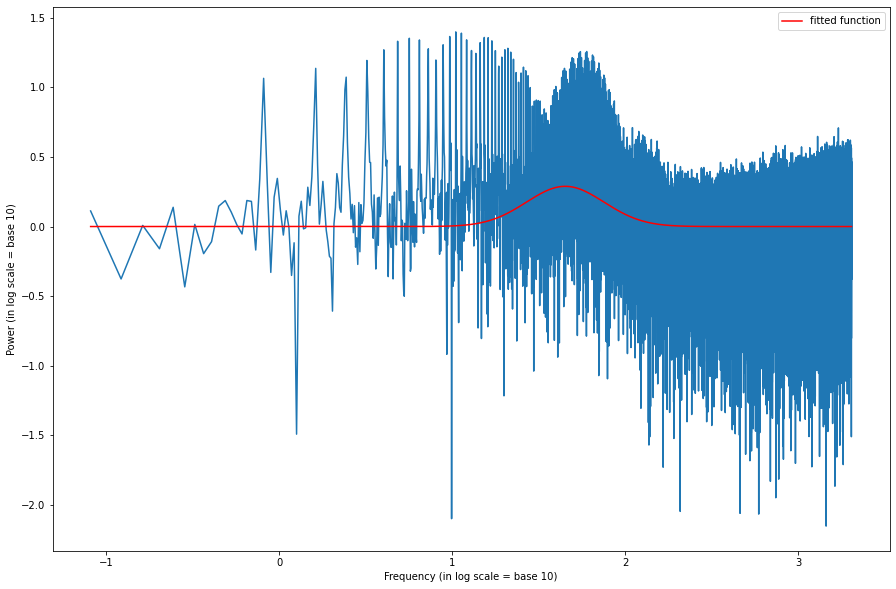

In [ ]:
## Fitting gaussian curve into the data

def gauss_f(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/2*sigma**2)

popt, pcov = curve_fit(gauss_f, Frequency_log, Subtraction) #p0=(1.25, 1.75, 0.75))

A, mu, sigma = popt
print(popt)

plt.plot(Frequency_log, Subtraction)
plt.xlabel("Frequency (in log scale = base 10)")
plt.ylabel("Power (in log scale = base 10)")

plt.plot(Frequency_log, gauss_f(Frequency_log, popt[0], popt[1], popt[2]), color='r', label='fitted function')
plt.legend(loc='best')
plt.show()

In [16]:
## From observation the peak is coming at log10(f) = 1.73

frequency = 10**(1.73)
Time_period = 1/frequency
print("Time period of the signal is, T =", Time_period, "sec")

Time period of the signal is, T = 0.018620871366628676 sec
